In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns 
%config InlineBackend.figure_format = 'retina' 
sns.set()

## Explore Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


<b>Attribute Information</b>
- 1) age
- 2) sex
- 3) chest pain type (4 values)
- 4) resting blood pressure
- 5) serum cholestoral in mg/dl
- 6) fasting blood sugar > 120 mg/dl
- 7) resting electrocardiographic results (values 0,1,2)
- 8) maximum heart rate achieved
- 9) exercise induced angina
- 10) oldpeak = ST depression induced by exercise relative to rest
- 11) the slope of the peak exercise ST segment
- 12) number of major vessels (0-3) colored by flourosopy
- 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- 14) target: 0= less chance of heart attack 1= more chance of heart attack


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.info()  # 13 integer, 1 float data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Exploratory Data Analysis (EDA Phase)

In [6]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.set_context('talk', font_scale=0.5)

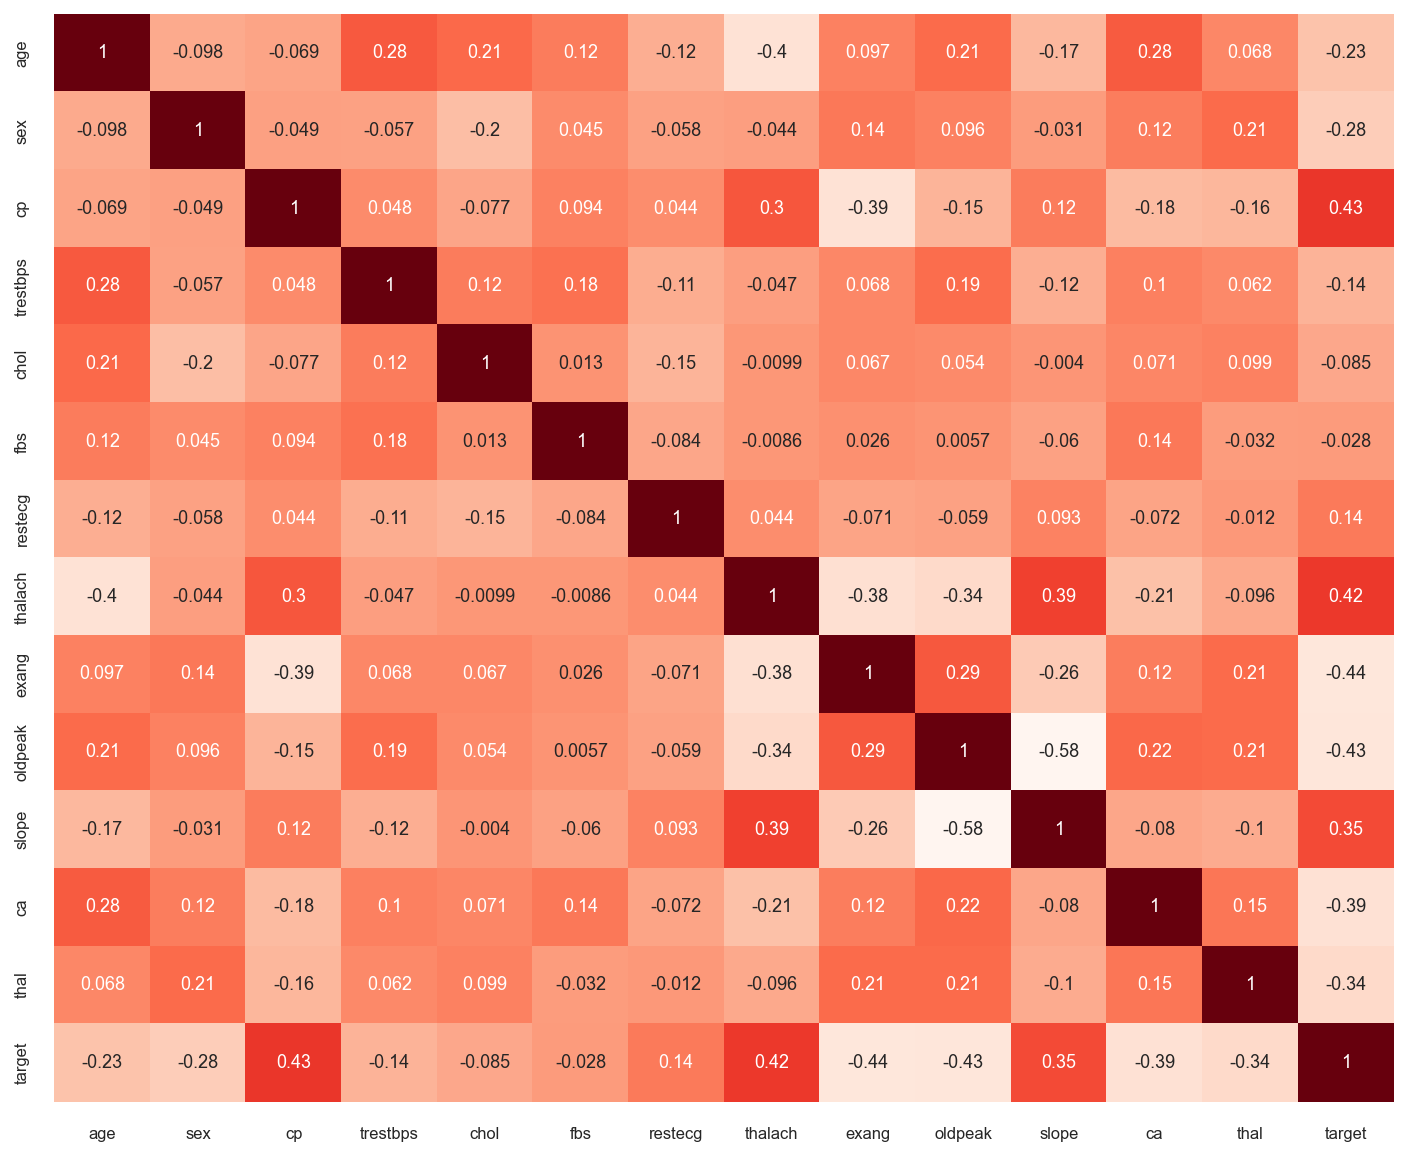

In [7]:
sns.heatmap(df.corr(), cmap='Reds', annot=True, cbar=False)

## Train Model

In [8]:
import sklearn
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [9]:
x = df.drop('target', axis=1)
x = preprocessing.scale(x)
y = df['target']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
acc = (clf.score(x_train, y_train))*100
print(f'Accuracy: %{acc}')

Accuracy: %90.09433962264151


## Prediction

In [13]:
true_count, false_count = 0, 0
for x,y in zip(x_test, y_test):
    if clf.predict([x])[0] == y:
        true_count += 1
    else:
        false_count += 1
        
print('True Prediction Count: ', true_count)
print('False Prediction Count: ', false_count)
print('='*30)
print('Accuracy Rate on Dataset: %{:.2f}'.format(true_count/(true_count+false_count)*100))

True Prediction Count:  77
False Prediction Count:  14
Accuracy Rate on Dataset: %84.62


In [14]:
for x,y in zip(x_test,y_test):
  print(f"Predicted Target:{clf.predict([x])[0]}, Actual Target: {y}")

Predicted Target:0, Actual Target: 0
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 0
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 0
Predicted Target:0, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 0
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 0
Predicted Target:1, Actual Target: 0
Predicted Target:0, Actual Target: 0
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 0
Predicted Target:0, Actual Target: 0
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 1
Predicted Target:1, Actual Target: 0
Predicted Target:1, Actual Target: 1
Predicted Target:1, Actual Target: 1
Predicted Target:0, Actual Target: 0
P

## SVM for Classification

In [15]:
from sklearn import svm

In [16]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)
confidence = svm_clf.score(x_train, y_train)
print(f'Accuracy: %{confidence*100}')

Accuracy: %88.67924528301887


In [17]:
true_count2, false_count2 = 0, 0
for x,y in zip(x_test, y_test):
    if svm_clf.predict([x])[0] == y:
        true_count2 += 1
    else:
        false_count2 += 1
        
print('True Prediction Count: ', true_count2)
print('False Prediction Count: ', false_count2)
print('='*30)
print('Accuracy Rate on Dataset: %{:.2f}'.format(true_count2/(true_count2+false_count2)*100))

True Prediction Count:  79
False Prediction Count:  12
Accuracy Rate on Dataset: %86.81


In [18]:
for x,y in zip(x_test,y_test):
  print(f"Mode1:{svm_clf.predict([x])[0]}, Actual: {y}")

Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 0
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 0
Mode1:1, Actual: 0
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Act